In [97]:
## CE 295 - Energy Systems and Control
#   HW 3 : Optimal Economic Dispatch in Distribution Feeders with Renewables
#   Davalos, Hannah, SID 3037185280
#   Prof. Arnold
# hi

# DAVALOS_HANNAH_HW3.ipynb
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *
# import cvxpy as cp
%matplotlib inline
import pandas as pd

In [105]:
## 13 Node IEEE Test Feeder Parameters

### Node (aka Bus) Data
# l_j^P: Active power consumption [MW]
l_P = np.array([0,0.2,0,0.4,0.17,0.23,1.155,0,0.17,0.843,0,
    0.17,0.128])

# l_j^Q: Reactive power consumption [MVAr]
l_Q = np.array([0,0.116,0,0.29,0.125,0.132,0.66,0,0.151,0.462,
    0,0.08,0.086])

# l_j^S: Apparent power consumption [MVA]
l_S = np.sqrt(l_P**2 + l_Q**2)

# s_j,max: Maximal generating power [MW]
s_max = np.array([5,0,0,3,0,0,0,0,0,3,0,0,0])

# c_j: Marginal generation cost [USD/MW]
c = np.array([[100],
              [0],
              [0],
              [150],
              [0],
              [0],
              [0],
              [0],
              [0],
              [50],
              [0],
              [0],
              [0]])

# V_min, V_max: Minimum and maximum nodal voltages [V]
v_min = 0.95
v_max = 1.05

# v_min = 0.98
# v_max = 1.02


### Edge (aka Line) Data
# r_ij: Resistance [p.u.]
r = np.array([[0, 0.007547918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0.0041, 0, 0.007239685, 0, 0.007547918, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0.004343811, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0.003773959, 0, 0, 0.004322245, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00434686, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004343157, 0.01169764],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# x_ij: Reactance [p.u.]
x = np.array([[0, 0.022173236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0.0064, 0, 0.007336076, 0, 0.022173236, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0.004401645, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0.011086618, 0, 0, 0.004433667, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002430473, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004402952, 0.004490848],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# I_max_ij: Maximal line current [p.u.]
I_max = np.array([[0, 3.0441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1.4178, 0, 0.9591, 0, 3.0441, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3.1275, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0.9591, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 3.0441, 3.1275, 0, 0.9591, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.37193, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9591, 1.2927],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# A_ij: Adjacency matrix; A_ij = 1 if i is parent of j
A = np.array([[1, 1, 0,	0, 0, 0, 0,	0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,	0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


### Set Data
# List of node indices
j_idx = np.arange(13)

# \rho(j): Parent node of node j
rho = np.array([0,0,1,2,1,4,1,6,6,8,6,10,10])

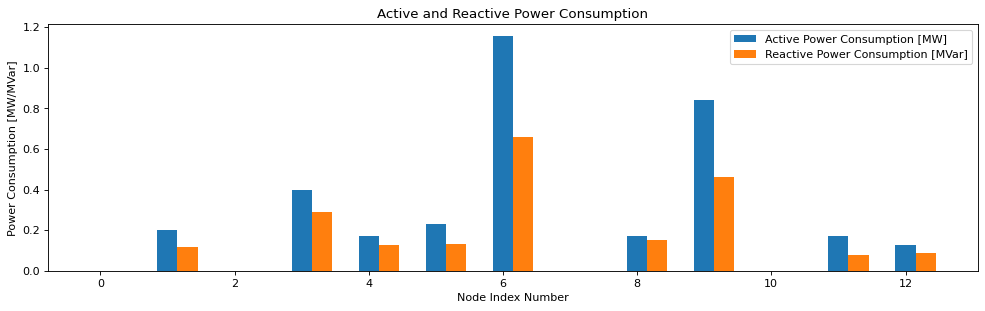

In [22]:
## Problem 1

# Plot active and reactive power consumption
plt.figure(num=1, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
 
width = 0.3
# create plot
# fig = plt.subplots(figsize =(10, 7))
plt.bar(j_idx, l_P, width, label = 'Active Power Consumption [MW]')
plt.bar(j_idx + width, l_Q, width, label = 'Reactive Power Consumption [MVar]')
plt.title('Active and Reactive Power Consumption')
plt.xlabel('Node Index Number')
plt.ylabel('Power Consumption [MW/MVar]')
plt.legend()
plt.show()

In [100]:
## Problem 2

# Assumptions:
#   - Disregard the entire network diagram
#   - Balance supply and demand, without any network considerations
#   - Goal is to minimize generation costs, given by c^T s

# Solve with CVXPY

# Define optimization vars
p = Variable(13)
q = Variable(13)
s = Variable(13)

# Define objective function
objective = Minimize(c.T@s)

# Define constraints
# Apparent Power Limits
constraints = [s <= s_max]

# Balance power generation with power consumption
constraints += [sum(l_P) == sum(p)]
constraints += [sum(l_Q) == sum(q)]

# Loop over each node
for jj in j_idx:
    
    # Non-negative power generation
    constraints += [p[jj] >= 0]
    constraints += [q[jj] >= 0]

    # Compute apparent power from active & reactive power
    constraints += [norm(vstack([p[jj], q[jj]])) <= s[jj]]

# Define problem and solve
prob2 = Problem(objective, constraints)
prob2.solve()

# Output Results
print("------------------- PROBLEM 2 --------------------")
print("--------------------------------------------------")
print(prob2.status)
print("Minimum Generating Cost : %4.2f"%(prob2.value),"USD")
print(" ")
print("Node 0 [Grid]  Gen Power : p_0 = %1.3f"%(p[0].value), "MW | q_0 = %1.3f"%(q[0].value), "MVAr | s_0 = %1.3f"%(s[0].value),"MVA")
print("Node 3 [Gas]   Gen Power : p_3 = %1.3f"%(p[3].value), "MW | q_3 = %1.3f"%(q[3].value), "MVAr | s_3 = %1.3f"%(s[3].value),"MVA")
print("Node 9 [Solar] Gen Power : p_9 = %1.3f"%(p[9].value), "MW | q_9 = %1.3f"%(q[9].value), "MVAr | s_9 = %1.3f"%(s[9].value),"MVA")
print(" ")
print("Total active power   : %1.3f"%(np.sum(l_P)),"MW   consumed | %1.3f"%(np.sum(p.value)),"MW   generated")
print("Total reactive power : %1.3f"%(np.sum(l_Q)),"MVAr consumed | %1.3f"%(np.sum(q.value)),"MVAr generated")
print("Total apparent power : %1.3f"%(np.sum(l_S)),"MVA  consumed | %1.3f"%(np.sum(s.value)),"MVA  generated")

------------------- PROBLEM 2 --------------------
--------------------------------------------------
optimal
Minimum Generating Cost : 255.36 USD
 
Node 0 [Grid]  Gen Power : p_0 = 0.901 MW | q_0 = 0.546 MVAr | s_0 = 1.054 MVA
Node 3 [Gas]   Gen Power : p_3 = 0.000 MW | q_3 = 0.000 MVAr | s_3 = 0.000 MVA
Node 9 [Solar] Gen Power : p_9 = 2.565 MW | q_9 = 1.556 MVAr | s_9 = 3.000 MVA
 
Total active power   : 3.466 MW   consumed | 3.466 MW   generated
Total reactive power : 2.102 MVAr consumed | 2.102 MVAr generated
Total apparent power : 4.063 MVA  consumed | 4.054 MVA  generated


In [101]:
## Problem 3

# Assumptions:
#   - Disregard L_ij, the squared magnitude of complex line current
#   - Disregard nodal voltage equation
#   - Disregard nodal voltage limits
#   - Disregard maximum line current
#   - Goal is to minimize generation costs, given by c^T s

# Solve with CVXPY

# Define optimization vars
p = Variable(13)
q = Variable(13)
s = Variable(13)
P = Variable((13,13))
Q = Variable((13,13))

# Define objective function
objective =  Minimize(c.T@s)

# Define constraints
# Apparent Power Limits
constraints = [s <= s_max]

# Boundary condition for power line flows
constraints += [P[0,0] == 0,
               Q[0,0] == 0]

# Loop over each node
for jj in j_idx:

    # Non-negative power generation
    constraints += [p[jj] >= 0]
    constraints += [q[jj] >= 0]
    
    # Parent node, i = \rho(j)
    ii = rho[jj]

    # Line Power Flows
    constraints += [P[ii][jj] == (l_P[jj]-p[jj]) + A[jj]@P[jj].T]
    constraints += [Q[ii][jj] == (l_Q[jj]-q[jj]) + A[jj]@Q[jj].T]

    # Compute apparent power from active & reactive power
    constraints += [norm(vstack([p[jj], q[jj]])) <= s[jj]]


# Define problem and solve
prob3 = Problem(objective, constraints)
prob3.solve()

# The optimal dual variable (Lagrange multiplier) for constraint (7)
mu_s = constraints[0].dual_value[9]

# Output Results
print("------------------- PROBLEM 3 --------------------")
print("--------------------------------------------------")
print(prob3.status)
print("Minimum Generating Cost : %4.2f"%(prob3.value),"USD")
print(" ")
print("Node 0 [Grid]  Gen Power : p_0 = %1.3f"%(p[0].value), "MW | q_0 = %1.3f"%(q[0].value), "MVAr | s_0 = %1.3f"%(s[0].value),"MVA")
print("Node 3 [Gas]   Gen Power : p_3 = %1.3f"%(p[3].value), "MW | q_3 = %1.3f"%(q[3].value), "MVAr | s_3 = %1.3f"%(s[3].value),"MVA")
print("Node 9 [Solar] Gen Power : p_9 = %1.3f"%(p[9].value), "MW | q_9 = %1.3f"%(q[9].value), "MVAr | s_9 = %1.3f"%(s[9].value),"MVA")
print(" ")
print("Total active power   : %1.3f"%(np.sum(l_P)),"MW   consumed | %1.3f"%(np.sum(p.value)),"MW   generated")
print("Total reactive power : %1.3f"%(np.sum(l_Q)),"MVAr consumed | %1.3f"%(np.sum(q.value)),"MVAr generated")
print("Total apparent power : %1.3f"%(np.sum(l_S)),"MVA  consumed | %1.3f"%(np.sum(s.value)),"MVA  generated")
print("optimal (s <= s_max) dual variable", mu_s) 

------------------- PROBLEM 3 --------------------
--------------------------------------------------
optimal
Minimum Generating Cost : 255.36 USD
 
Node 0 [Grid]  Gen Power : p_0 = 0.901 MW | q_0 = 0.546 MVAr | s_0 = 1.054 MVA
Node 3 [Gas]   Gen Power : p_3 = 0.000 MW | q_3 = 0.000 MVAr | s_3 = 0.000 MVA
Node 9 [Solar] Gen Power : p_9 = 2.565 MW | q_9 = 1.556 MVAr | s_9 = 3.000 MVA
 
Total active power   : 3.466 MW   consumed | 3.466 MW   generated
Total reactive power : 2.102 MVAr consumed | 2.102 MVAr generated
Total apparent power : 4.063 MVA  consumed | 4.054 MVA  generated
optimal (s <= s_max) dual variable 49.99999997228853


In [104]:
## Problem 4

# Assumptions:
#   - Add back all previously disregarded terms and constraints
#   - Relax squared line current equation into inequality
#   - Goal is to minimize generation costs, given by c^T s

# Solve with CVXPY

# Define optimization vars
p = Variable(13)
q = Variable(13)
s = Variable(13)
P = Variable((13,13))
Q = Variable((13,13))
V = Variable(13)
L = Variable((13,13))

# Define objective function
objective =  Minimize(c.T@s)

# Define constraints
# Apparent Power Limits
constraints = [s <= s_max]

# Boundary condition for power line flows
constraints += [P[0,0] == 0,
                Q[0,0] == 0]

# Boundary condition for squared line current
constraints += [L[0,0] == 0]

# Fix node 0 voltage to be 1 "per unit" (p.u.)
constraints += [V[0] == 1]

# Loop over each node
for jj in j_idx:

    # Nodal voltage limits
    constraints += [v_min**2 <= V[jj]]
    constraints += [V[jj] <= v_max**2]

    # Non-negative power generation
    constraints += [p[jj] >= 0]
    constraints += [q[jj] >= 0]
    
    # Parent node, i = \rho(j)
    ii = rho[jj]

    # Squared line current limits
    constraints += [L[ii][jj] <= (I_max[ii][jj])**2]
    
    # Line Power Flows
    constraints += [P[ii][jj] == (l_P[jj]-p[jj]) + r[ii][jj]*L[ii][jj] + A[jj]@P[jj].T]
    constraints += [Q[ii][jj] == (l_Q[jj]-q[jj]) + x[ii][jj]*L[ii][jj] + A[jj]@Q[jj].T]

    # Nodal voltage
    constraints += [V[jj] == V[ii] + ((r[ii][jj])**2 + (x[ii][jj])**2)*L[ii][jj] - 2*(r[ii][jj]*P[ii][jj]+x[ii][jj]*Q[ii][jj])]

    # Squared current magnitude on lines
    constraints += [L[ii][jj] >= quad_over_lin(vstack([P[ii][jj],Q[ii][jj]]),V[jj])]
    
    # Compute apparent power from active & reactive power
    constraints += [norm(vstack([p[jj], q[jj]])) <= s[jj]]

# Define problem and solve
prob4 = Problem(objective, constraints)
prob4.solve()

# Output Results
print("------------------- PROBLEM 4 --------------------")
print("--------------------------------------------------")
print(prob4.status)
print("Minimum Generating Cost : %4.2f"%(prob4.value),"USD")
print(" ")
print("Node 0 [Grid]  Gen Power : p_0 = %1.3f"%(p[0].value), "MW | q_0 = %1.3f"%(q[0].value), "MVAr | s_0 = %1.3f"%(s[0].value),"MVA")
print("Node 3 [Gas]   Gen Power : p_3 = %1.3f"%(p[3].value), "MW | q_3 = %1.3f"%(q[3].value), "MVAr | s_3 = %1.3f"%(s[3].value),"MVA")
print("Node 9 [Solar] Gen Power : p_9 = %1.3f"%(p[9].value), "MW | q_9 = %1.3f"%(q[9].value), "MVAr | s_9 = %1.3f"%(s[9].value),"MVA")
print(" ")
print("Total active power   : %1.3f"%(np.sum(l_P)),"MW   consumed | %1.3f"%(np.sum(p.value)),"MW   generated")
print("Total reactive power : %1.3f"%(np.sum(l_Q)),"MVAr consumed | %1.3f"%(np.sum(q.value)),"MVAr generated")
print("Total apparent power : %1.3f"%(np.sum(l_S)),"MVA  consumed | %1.3f"%(np.sum(s.value)),"MVA  generated")
print(" ")

for jj in j_idx:
    print("Node %2.0f"%(jj), "Voltage : %1.3f"%((V[jj].value)**0.5), "p.u. || ", "mu_vmin: %3.0f"%(constraints[5+(jj*10)].dual_value), " | mu_vmax: %3.0f"%(constraints[6+(jj*10)].dual_value))
    print("Node %2.0f"%(jj), "Dual Value of (9):" "mu_I^2_max: %3.0f"%(constraints[9+(jj*10)].dual_value))

------------------- PROBLEM 4 --------------------
--------------------------------------------------
optimal
Minimum Generating Cost : 348.67 USD
 
Node 0 [Grid]  Gen Power : p_0 = 0.940 MW | q_0 = 0.174 MVAr | s_0 = 0.956 MVA
Node 3 [Gas]   Gen Power : p_3 = 0.760 MW | q_3 = 0.518 MVAr | s_3 = 0.920 MVA
Node 9 [Solar] Gen Power : p_9 = 1.789 MW | q_9 = 1.450 MVAr | s_9 = 2.303 MVA
 
Total active power   : 3.466 MW   consumed | 3.489 MW   generated
Total reactive power : 2.102 MVAr consumed | 2.142 MVAr generated
Total apparent power : 4.063 MVA  consumed | 4.178 MVA  generated
 
Node  0 Voltage : 1.000 p.u. ||  mu_vmin:   0  | mu_vmax:   0
Node  0 Dual Value of (9):mu_I^2_max: 200
Node  1 Voltage : 0.989 p.u. ||  mu_vmin:   0  | mu_vmax:   0
Node  1 Dual Value of (9):mu_I^2_max:   0
Node  2 Voltage : 0.992 p.u. ||  mu_vmin:   0  | mu_vmax:   0
Node  2 Dual Value of (9):mu_I^2_max:   0
Node  3 Voltage : 0.992 p.u. ||  mu_vmin:   0  | mu_vmax:   0
Node  3 Dual Value of (9):mu_I^2_max: 

In [106]:
## Problem 5

# Assumptions:
#   - Assume solar generator at node 9 has uncertain power capacity
#   - Goal is to minimize generation costs, given by c^T s, in face of uncertainty

# Solve with CVXPY

# Define optimization vars
p = Variable(13)
q = Variable(13)
s = Variable(13)
P = Variable((13,13))
Q = Variable((13,13))
V = Variable(13)
L = Variable((13,13))
sigma_A = Variable(1)
sigma_B = Variable(1)

# Robust optimization decision vars
y = vstack([sigma_A,sigma_B,s[9]])

# Robust optimization parameters
bar_a = np.array([-1.25,-1.25,1])

E = np.array([[0.25, 0, 0],
              [0, 0.25, 0],
              [0, 0, 0]])

# Define objective function
objective =  Minimize(c.T@s)

# Define constraints
# Apparent Power Limits
constraints = [s <= s_max]

# Boundary condition for power line flows
constraints += [P[0,0] == 0,
                Q[0,0] == 0]

# Boundary condition for squared line current
constraints += [L[0,0] == 0]

# Fix node 0 voltage to be 1 "per unit" (p.u.)
constraints += [V[0] == 1]

# Robust Optimization Constraints
constraints += [bar_a@y + norm(E@y) <= 0]
constraints += [sigma_A >= 0, sigma_A <= 1]
constraints += [sigma_B >= 0, sigma_B <= 1]

# Loop over each node
for jj in j_idx:

    # Nodal voltage limits
    constraints += [v_min**2 <= V[jj]]
    constraints += [V[jj] <= v_max**2]

    # Non-negative power generation
    constraints += [p[jj] >= 0]
    constraints += [q[jj] >= 0]
    
    # Parent node, i = \rho(j)
    ii = rho[jj]
    
    # Squared line current limits
    constraints += [L[ii][jj] <= (I_max[ii][jj])**2]
    
    # Line Power Flows
    constraints += [P[ii][jj] == (l_P[jj]-p[jj]) + r[ii][jj]*L[ii][jj] + A[jj]@P[jj].T]
    constraints += [Q[ii][jj] == (l_Q[jj]-q[jj]) + x[ii][jj]*L[ii][jj] + A[jj]@Q[jj].T]

    # Nodal voltage
    constraints += [V[jj] == V[ii] + ((r[ii][jj])**2 + (x[ii][jj])**2)*L[ii][jj] - 2*(r[ii][jj]*P[ii][jj]+x[ii][jj]*Q[ii][jj])]

    # Squared current magnitude on lines
    constraints += [L[ii][jj] >= quad_over_lin(vstack([P[ii][jj],Q[ii][jj]]),V[jj])]
    
    # Compute apparent power from active & reactive power
    constraints += [norm(vstack([p[jj], q[jj]])) <= s[jj]]

    
# Define problem and solve
prob5 = Problem(objective, constraints)
prob5.solve()

# Output Results
print("------------------- PROBLEM 5 --------------------")
print("--------------------------------------------------")
print(prob5.status)
print("Minimum Generating Cost : %4.2f"%(prob5.value),"USD")
print(" ")
print("Node 0 [Grid]  Gen Power : p_0 = %1.3f"%(p[0].value), "MW | q_0 = %1.3f"%(q[0].value), "MVAr | s_0 = %1.3f"%(s[0].value),"MVA")
print("Node 3 [Gas]   Gen Power : p_3 = %1.3f"%(p[3].value), "MW | q_3 = %1.3f"%(q[3].value), "MVAr | s_3 = %1.3f"%(s[3].value),"MVA")
print("Node 9 [Solar] Gen Power : p_9 = %1.3f"%(p[9].value), "MW | q_9 = %1.3f"%(q[9].value), "MVAr | s_9 = %1.3f"%(s[9].value),"MVA")
print(" ")
print("Total active power   : %1.3f"%(np.sum(l_P)),"MW   consumed | %1.3f"%(np.sum(p.value)),"MW   generated")
print("Total reactive power : %1.3f"%(np.sum(l_Q)),"MVAr consumed | %1.3f"%(np.sum(q.value)),"MVAr generated")
print("Total apparent power : %1.3f"%(np.sum(l_S)),"MVA  consumed | %1.3f"%(np.sum(s.value)),"MVA  generated")
print(" ")

------------------- PROBLEM 5 --------------------
--------------------------------------------------
optimal
Minimum Generating Cost : 308.72 USD
 
Node 0 [Grid]  Gen Power : p_0 = 1.745 MW | q_0 = 1.006 MVAr | s_0 = 2.014 MVA
Node 3 [Gas]   Gen Power : p_3 = 0.000 MW | q_3 = 0.000 MVAr | s_3 = -0.000 MVA
Node 9 [Solar] Gen Power : p_9 = 1.770 MW | q_9 = 1.215 MVAr | s_9 = 2.146 MVA
 
Total active power   : 3.466 MW   consumed | 3.514 MW   generated
Total reactive power : 2.102 MVAr consumed | 2.221 MVAr generated
Total apparent power : 4.063 MVA  consumed | 4.160 MVA  generated
 
